# **Data Loading and Merging**

**Data Loading and Merging**

In this section, the final dataset is created. The Kaggle dataset comes in two parts, one for the movie details and the other with the review information, so they have to be mergerd in order to work with the data.

In [ ]:
import pandas as pd

In [ ]:
# Loading the movie review dataset and reading the JSON to a dataframe
df_reviews = pd.read_json('/content/drive/MyDrive/IMDB_reviews.json', lines=True)

# Displaying the first few rows of the dataframe
df_reviews.head()

In [ ]:
# Displaying the shape of the dataframe
df_reviews.shape

In [ ]:
#Loading the movie information dataset and reading the JSON to a dataframe
df_movies = pd.read_json('/content/drive/MyDrive/IMDB_movie_details.json',lines=True)

# Displaying the first few rows of the data
df_movies.head()

In [ ]:
# Displaying the shape of the data
df_movies.shape

In [ ]:
#Merging the Movie and Review data on the common field 'movie_id'
merged_df = pd.merge(df_reviews, df_movies, on='movie_id', how='inner')

# Display the merged DataFrameset

#Exporting the Merged Data as a CSV
merged_df.to_csv('Movie_Review_Dataset_final.csv')

In [ ]:
#Loading the merged dataset into a dataframe
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Movie_Review_Dataset_final.csv')

# **Dataset Features and Statistics**



In this section, the dataset is parsed and dug into for better understanding pre-data cleaning and model training.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573906 entries, 0 to 573905
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      573906 non-null  int64  
 1   review_date     573906 non-null  object 
 2   movie_id        573906 non-null  object 
 3   user_id         573906 non-null  object 
 4   is_spoiler      573906 non-null  bool   
 5   review_text     573906 non-null  object 
 6   rating_x        573906 non-null  int64  
 7   review_summary  573903 non-null  object 
 8   plot_summary    573906 non-null  object 
 9   duration        573906 non-null  object 
 10  genre           573906 non-null  object 
 11  rating_y        573906 non-null  float64
 12  release_date    573906 non-null  object 
 13  plot_synopsis   538828 non-null  object 
 14  review_length   573906 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(10)
memory usage: 61.8+ MB
None
Unnamed: 0            0
revie

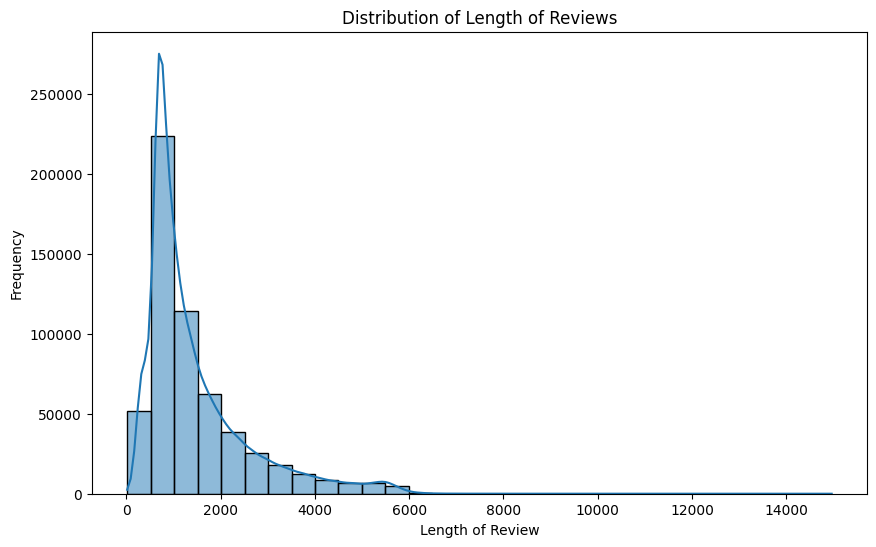

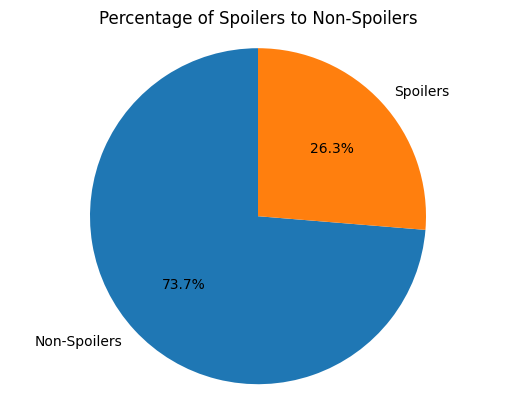

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

# Basic statistics of the dataset
print(df.describe())

# Distribution of Length of Reviews
df['review_length'] = df['review_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Length of Reviews')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

#Pie Chart of Spoilers to Non Spoilers
spoiler_counts = df['is_spoiler'].value_counts()
spoiler_percentages = spoiler_counts / spoiler_counts.sum() * 100
labels = ['Non-Spoilers', 'Spoilers']
sizes = [spoiler_percentages[0], spoiler_percentages[1]]

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Spoilers to Non-Spoilers')
plt.show()

# **Data Cleaning and Preprocessing**



Here, the movie review text data, is cleaned, and preprocessed using techniques like lowercasing, stop word removal and lemmatization.

In [ ]:
#Installing necessary packages for text cleaning and preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
#Text Cleaning for the review text data

#Remove URLS
df['cleaned_review'] = df['review_text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Remove user mentions
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: re.sub(r'@\w+', '', x))

# Remove hashtags
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: re.sub(r'#\w+', '', x))

# Remove punctuation
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove numbers
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
# Displaying the cleaned review text column
df['cleaned_review']

0         In its Oscar year Shawshank Redemption written...
1         The Shawshank Redemption is without a doubt on...
2         I believe that this film is the best story eve...
3         Yes there are SPOILERS hereThis film has had s...
4         At the heart of this extraordinary movie is a ...
                                ...                        
573901    Go is wise fast and pure entertainment Assembl...
573902    Well what shall I say this one´s fun at any ra...
573903    Go is the best movie I have ever seen and Ive ...
573904    Call this  teenage version of Pulp Fiction wha...
573905    Why was this movie made No doubt to sucker in ...
Name: cleaned_review, Length: 573906, dtype: object

In [ ]:
#Lowercasing

#Convert review to lowercase
df['cleaned_review'] = df['cleaned_review'].str.lower()

In [ ]:
#Stop word removal

#Download stopwords and wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Remove stop words
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

df['cleaned_review'] = df['cleaned_review'].apply(lambda x: remove_stop_words(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    word_tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized_text)

df['cleaned_review'] = df['cleaned_review'].apply(lambda x: lemmatize_text(x))


In [ ]:
print(df['cleaned_review'])

0         oscar year shawshank redemption written direct...
1         shawshank redemption without doubt one brillia...
2         believe film best story ever told film im tell...
3         yes spoiler herethis film emotional impact fin...
4         heart extraordinary movie brilliant indelible ...
                                ...                        
573901    go wise fast pure entertainment assembling exc...
573902    well shall say one´s fun rate three plotlines ...
573903    go best movie ever seen ive seen lot movie rea...
573904    call teenage version pulp fiction whatever wan...
573905    movie made doubt sucker familyrebelling mtv fa...
Name: cleaned_review, Length: 573906, dtype: object


In [ ]:
df['review_text_wordcount'] = df['review_text'].apply(lambda x: len(word_tokenize(x)))
df['cleaned_review_wordcount'] = df['cleaned_review'].df['processed'].apply(len)

# **Model Creation with Feature Extraction and Experimental Design**



Here, the dataset is being split into test and train sets. TF-IDF and Bag of Words have been used for Feature Extraction and Cross Validation for Experimental Design.

# Logistic Regression Models

Logistic Regression


Cross-validation scores: [0.77482982 0.77316869 0.77384244 0.77371466 0.77533833]
Mean cross-validation score: 0.7741787871159733
Test Accuracy: 0.7736083135276037
Test Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.94      0.86    105652
        True       0.64      0.31      0.42     37825

    accuracy                           0.77    143477
   macro avg       0.72      0.63      0.64    143477
weighted avg       0.75      0.77      0.74    143477



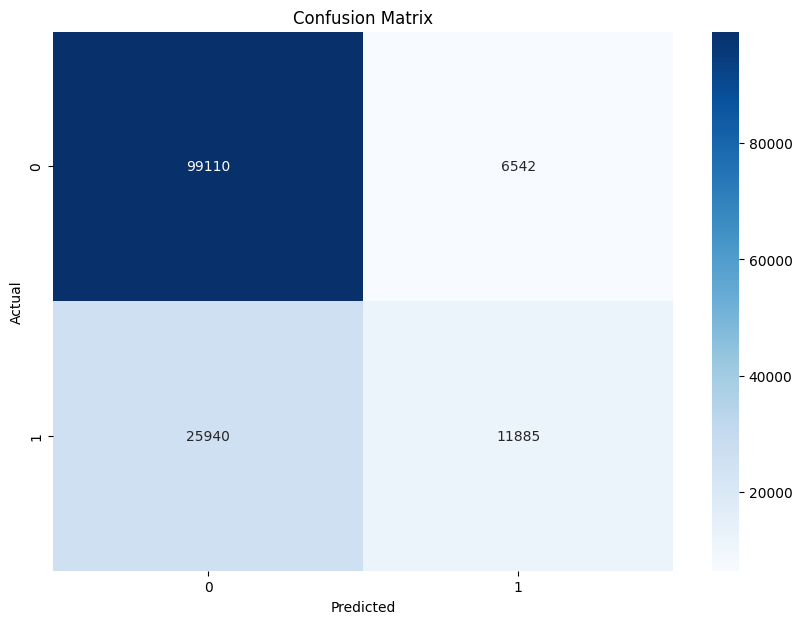

F1 Score: 0.7440915266041129
AUC: 0.7595011290355554


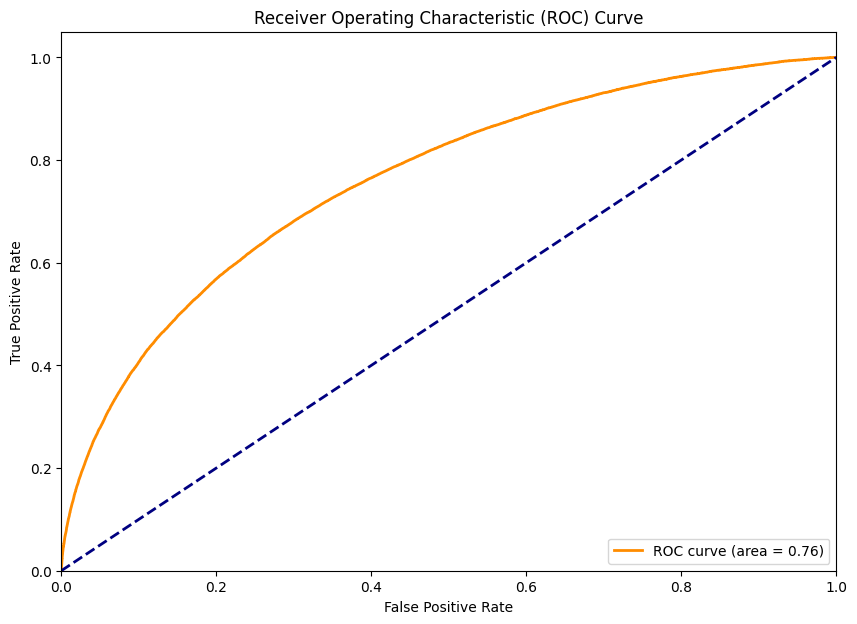

In [ ]:
#TF-IDF for Feature Extraction Techniques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns

# Split the data into features and target variable
X = df['cleaned_review']
y = df['is_spoiler']

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=2000)

# Perform 5-fold cross-validation on the original training set
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit the model on the entire training set
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# ROC Curve
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<ipython-input-12-714c44536067>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_positive_features, ax=axes[0], palette='Greens')
<ipython-input-12-714c44536067>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_negative_features, ax=axes[1], palette='Reds')


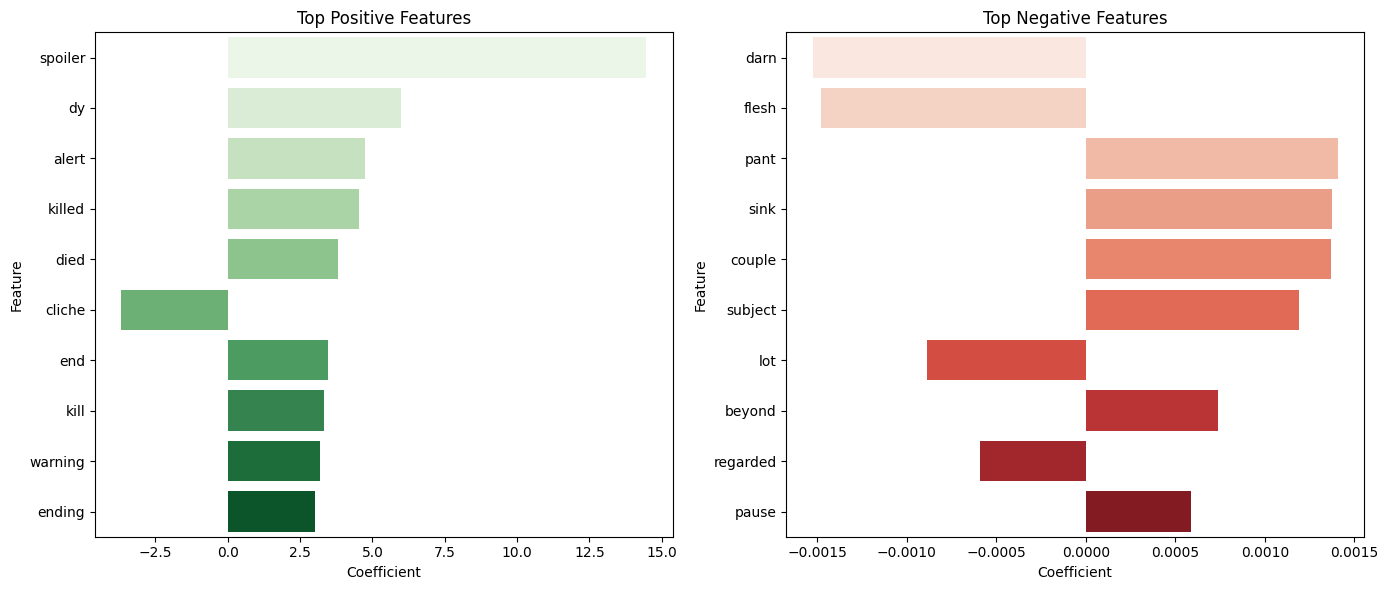

In [ ]:
# Analyze the coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute values of coefficients to get the most influential features
features_df = features_df.reindex(features_df.Coefficient.abs().sort_values(ascending=False).index)

# Top 10 positive and negative features
top_positive_features = features_df.head(10)
top_negative_features = features_df.tail(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_positive_features, ax=axes[0], palette='Greens')
axes[0].set_title('Top Positive Features')
sns.barplot(x='Coefficient', y='Feature', data=top_negative_features, ax=axes[1], palette='Reds')
axes[1].set_title('Top Negative Features')
plt.tight_layout()
plt.show()

Cross-validation scores: [0.77377274 0.7714611  0.77124039 0.77190252 0.77203926]
Mean cross-validation score: 0.7720832006116292
Test Accuracy: 0.7725907288276169
Test Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.95      0.86    105652
        True       0.66      0.28      0.40     37825

    accuracy                           0.77    143477
   macro avg       0.72      0.62      0.63    143477
weighted avg       0.75      0.77      0.74    143477



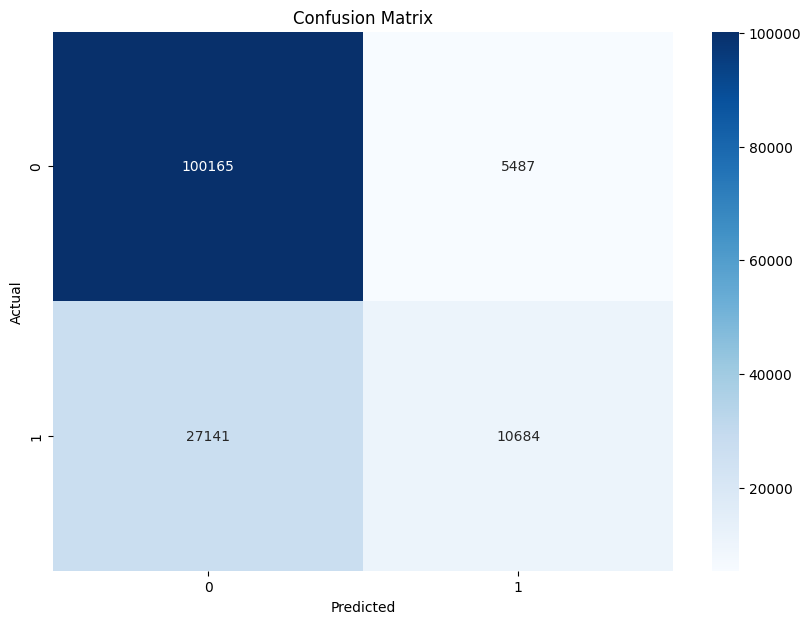

F1 Score: 0.7375609084897298
AUC: 0.7448065724460373


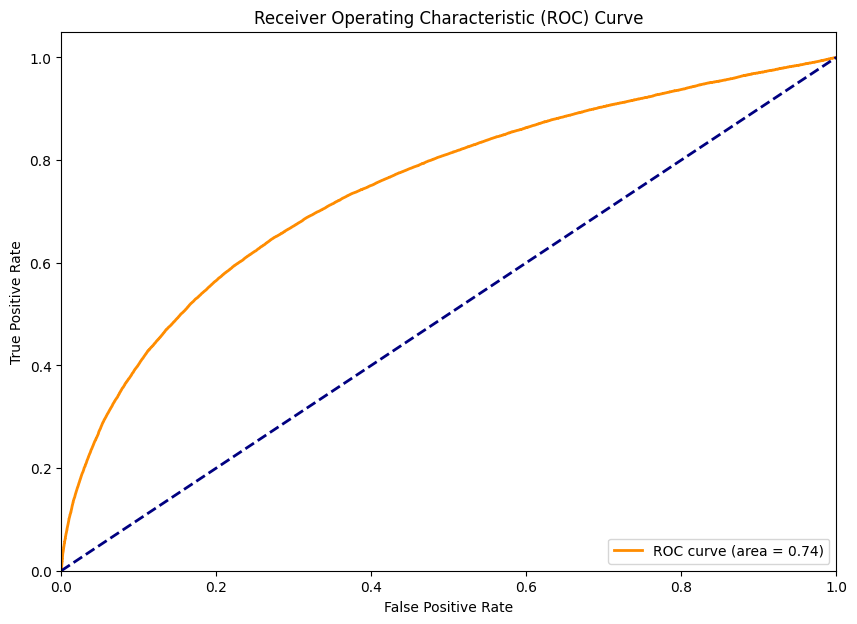

In [ ]:
#Bag of Words as the Feature Extraction Technique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns

# Split the data into features and target variable
X = df['cleaned_review']
y = df['is_spoiler']

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_bow = vectorizer.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=2000)

# Perform 5-fold cross-validation on the original training set
cv_scores = cross_val_score(model, X_train_bow, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit the model on the entire training set
model.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_bow)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# ROC Curve
y_prob = model.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<ipython-input-13-9ca5b622f61d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_positive_features, ax=axes[0], palette='Greens')
<ipython-input-13-9ca5b622f61d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_negative_features.iloc[::-1], ax=axes[1], palette='Reds')


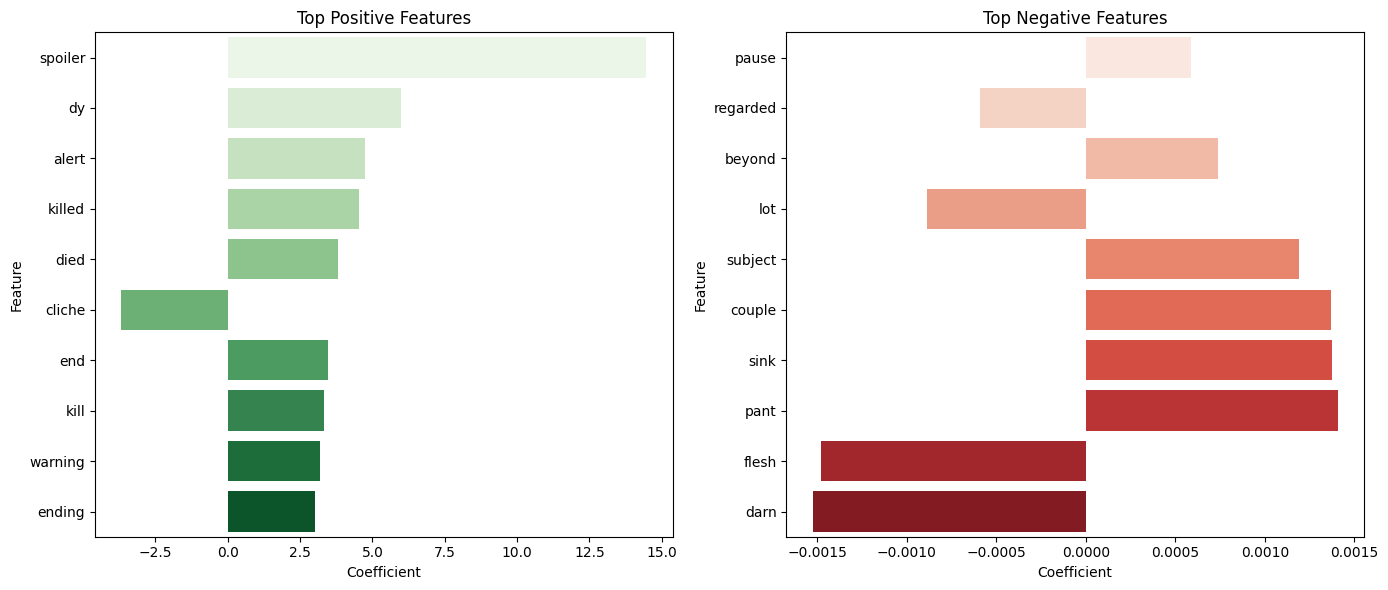

In [ ]:
# Analyze the coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute values of coefficients to get the most influential features
features_df = features_df.reindex(features_df.Coefficient.abs().sort_values(ascending=False).index)

# Top 10 positive and negative features
top_positive_features = features_df.head(10)
top_negative_features = features_df.tail(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_positive_features, ax=axes[0], palette='Greens')
axes[0].set_title('Top Positive Features')
sns.barplot(x='Coefficient', y='Feature', data=top_negative_features.iloc[::-1], ax=axes[1], palette='Reds')
axes[1].set_title('Top Negative Features')
plt.tight_layout()
plt.show()

# Naive Bayes Models

Naive Bayes

Cross-validation scores: [0.74602142 0.74725275 0.74749669 0.74688103 0.74678515]
Mean cross-validation score: 0.746887407441754
Test Accuracy: 0.7463983774402866
Test Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.99      0.85    105652
        True       0.74      0.06      0.11     37825

    accuracy                           0.75    143477
   macro avg       0.74      0.53      0.48    143477
weighted avg       0.74      0.75      0.66    143477



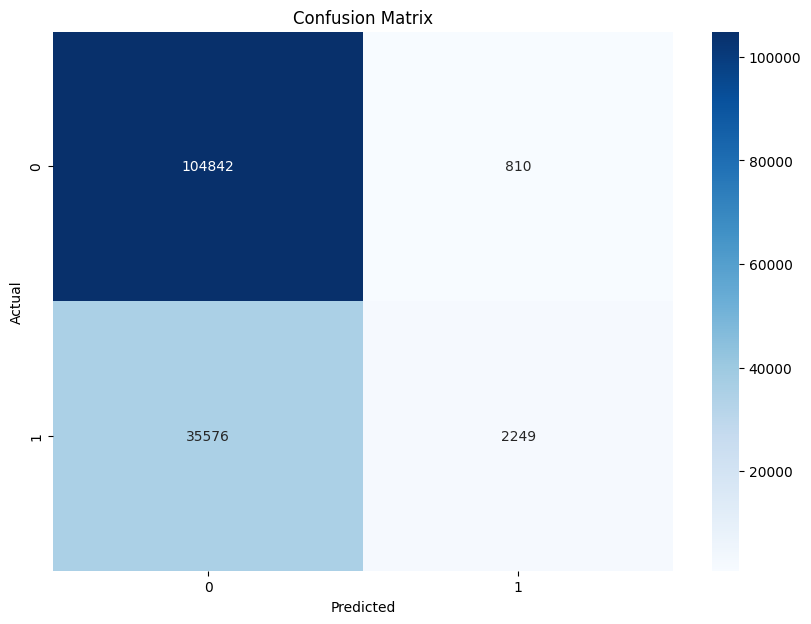

F1 Score: 0.6564874589265021
AUC: 0.7201464235463174


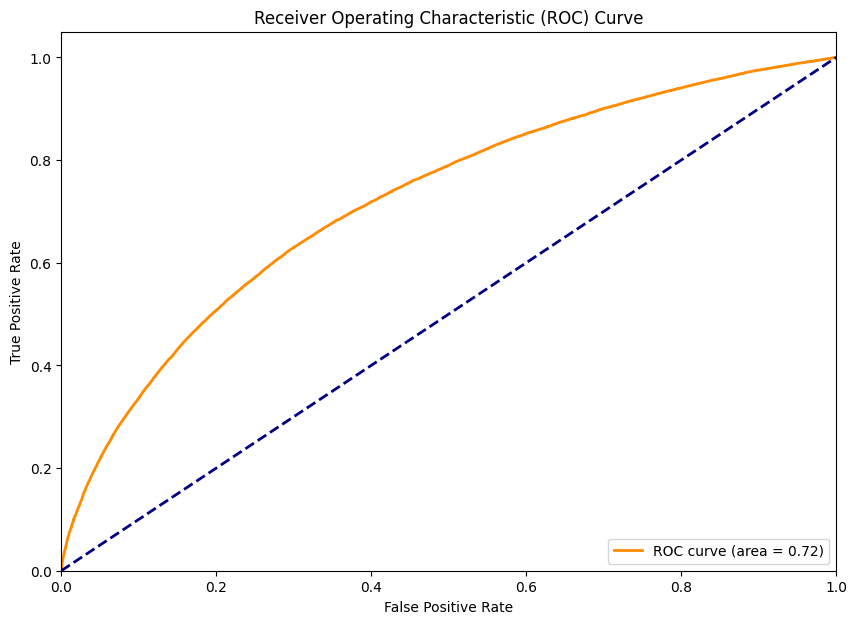

In [ ]:
#TF-IDF as the Feature Extraction Technique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns

# Split the data into features and target variable
X = df['cleaned_review']
y = df['is_spoiler']

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Perform 5-fold cross-validation on the original training set
cv_scores = cross_val_score(nb_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit the model on the entire training set
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# ROC Curve and AUC
y_prob = nb_model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<ipython-input-16-d866eed6397b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spoiler_probs, y=top_spoiler_features, orient='h', ax=ax1, palette='Reds')
<ipython-input-16-d866eed6397b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_non_spoiler_probs, y=top_non_spoiler_features, orient='h', ax=ax2, palette='Blues')


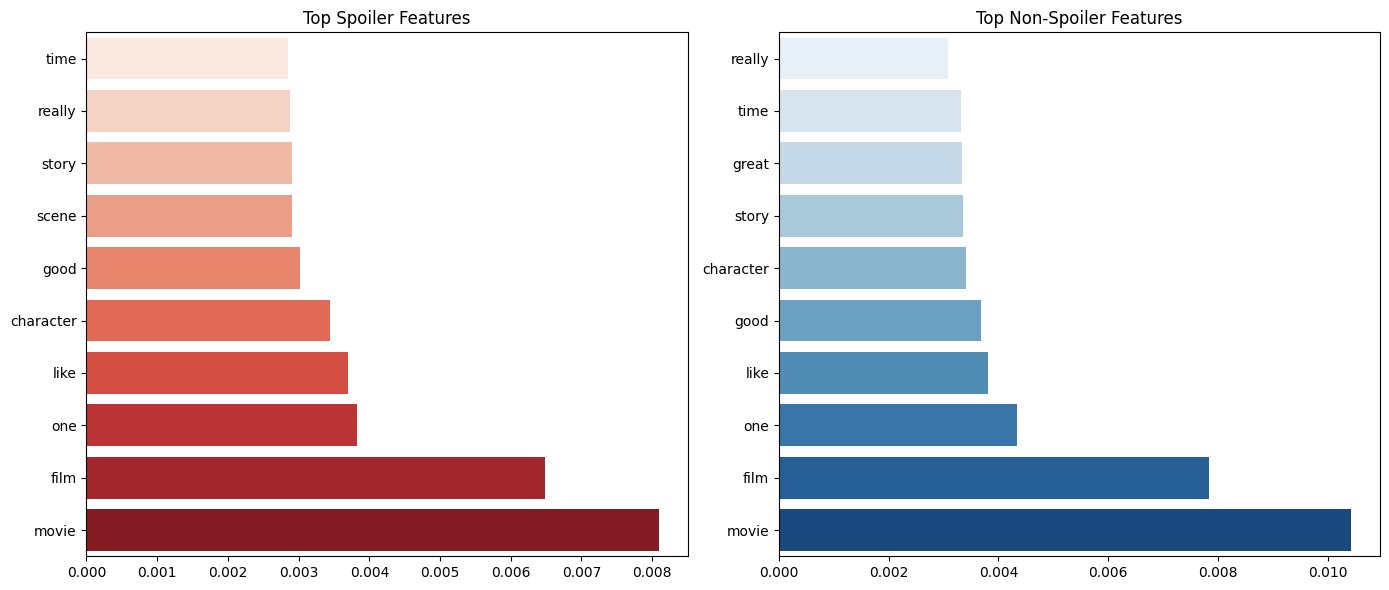

In [ ]:
# Get the feature log probabilities
log_prob = nb_model.feature_log_prob_
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top features for each class
num_top_features = 10
# Spoiler class
top_spoiler_indices = np.argsort(log_prob[1])[-num_top_features:]
top_spoiler_features = feature_names[top_spoiler_indices]
top_spoiler_probs = np.exp(log_prob[1][top_spoiler_indices])  # Convert log probabilities to probabilities

# Non-spoiler class
top_non_spoiler_indices = np.argsort(log_prob[0])[-num_top_features:]
top_non_spoiler_features = feature_names[top_non_spoiler_indices]
top_non_spoiler_probs = np.exp(log_prob[0][top_non_spoiler_indices])  # Convert log probabilities to probabilities

# Plotting the top features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=top_spoiler_probs, y=top_spoiler_features, orient='h', ax=ax1, palette='Reds')
ax1.set_title('Top Spoiler Features')
sns.barplot(x=top_non_spoiler_probs, y=top_non_spoiler_features, orient='h', ax=ax2, palette='Blues')
ax2.set_title('Top Non-Spoiler Features')
plt.tight_layout()
plt.show()

Cross-validation scores: [0.73237228 0.72907325 0.72850405 0.73040913 0.72987164]
Mean cross-validation score: 0.730046069910644
Test Accuracy: 0.7281376109062777
Test Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.81      0.81    105652
        True       0.49      0.50      0.49     37825

    accuracy                           0.73    143477
   macro avg       0.65      0.66      0.65    143477
weighted avg       0.73      0.73      0.73    143477



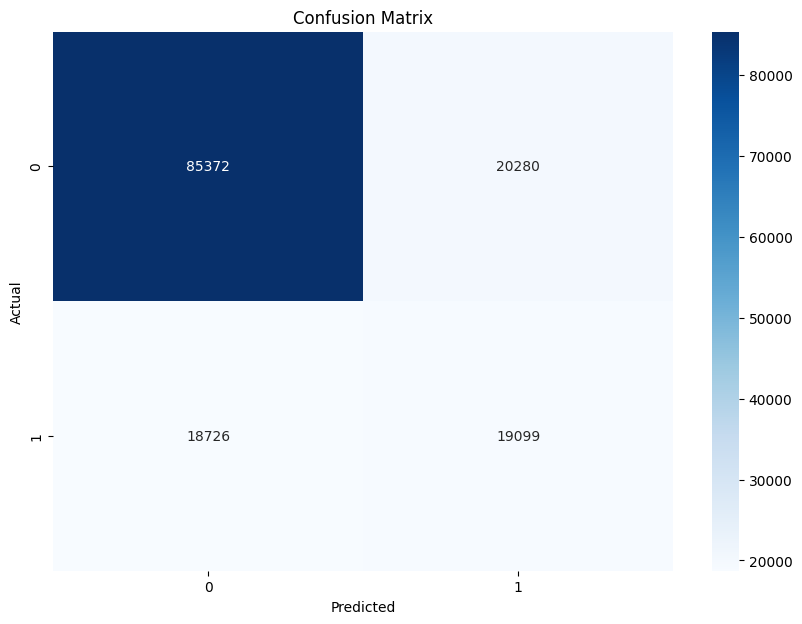

F1 Score: 0.7298666109425688
AUC: 0.6985210540064078


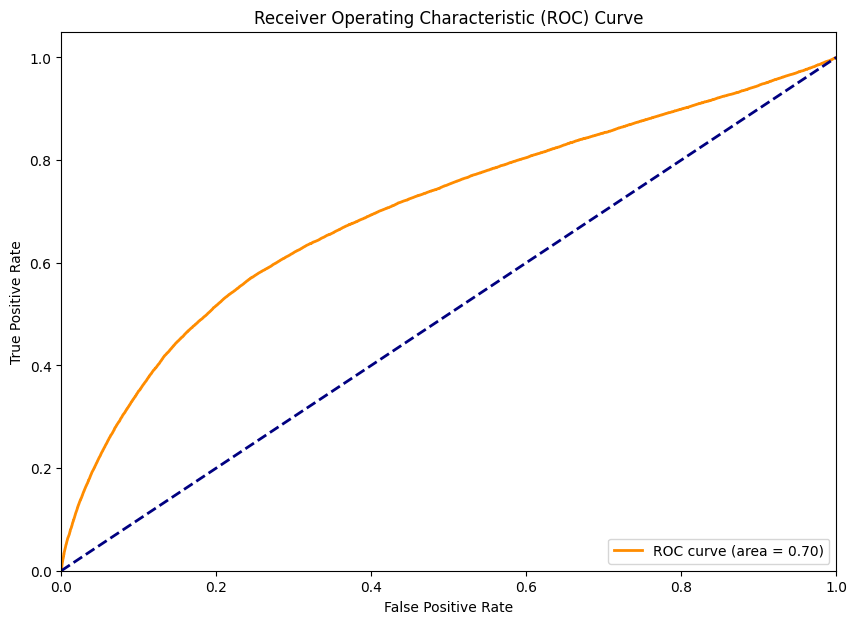

In [ ]:
#Bag of Words as the Feature Extraction Technique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns

# Split the data into features and target variable
X = df['cleaned_review']
y = df['is_spoiler']

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Count Vectorizer (Bag of Words)
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_bow = vectorizer.transform(X_test)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Perform 5-fold cross-validation on the original training set
cv_scores = cross_val_score(nb_model, X_train_bow, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit the model on the entire training set
nb_model.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_bow)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# ROC Curve
y_prob = nb_model.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<ipython-input-18-d866eed6397b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spoiler_probs, y=top_spoiler_features, orient='h', ax=ax1, palette='Reds')
<ipython-input-18-d866eed6397b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_non_spoiler_probs, y=top_non_spoiler_features, orient='h', ax=ax2, palette='Blues')


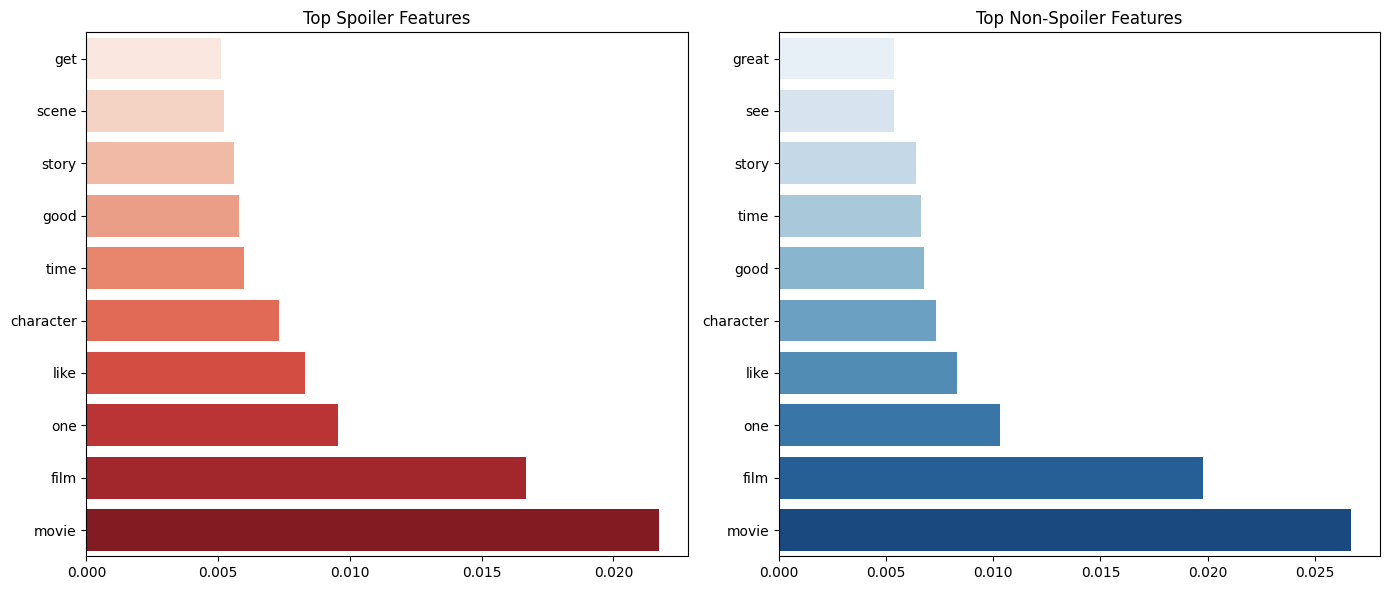

In [ ]:
# Get the feature log probabilities
log_prob = nb_model.feature_log_prob_
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top features for each class
num_top_features = 10
# Spoiler class
top_spoiler_indices = np.argsort(log_prob[1])[-num_top_features:]
top_spoiler_features = feature_names[top_spoiler_indices]
top_spoiler_probs = np.exp(log_prob[1][top_spoiler_indices])  # Convert log probabilities to probabilities

# Non-spoiler class
top_non_spoiler_indices = np.argsort(log_prob[0])[-num_top_features:]
top_non_spoiler_features = feature_names[top_non_spoiler_indices]
top_non_spoiler_probs = np.exp(log_prob[0][top_non_spoiler_indices])  # Convert log probabilities to probabilities

# Plotting the top features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=top_spoiler_probs, y=top_spoiler_features, orient='h', ax=ax1, palette='Reds')
ax1.set_title('Top Spoiler Features')
sns.barplot(x=top_non_spoiler_probs, y=top_non_spoiler_features, orient='h', ax=ax2, palette='Blues')
ax2.set_title('Top Non-Spoiler Features')
plt.tight_layout()
plt.show()

# Bi-LSTM Models

Bi-LSTM

Bi-LSTM Model would not run due to size of dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.under_sampling import RandomUnderSampler

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Split the data into features and target variable
X = df['cleaned_review']
y = df['is_spoiler'].to_numpy()

# Initialize the CountVectorizer for Bag of Words features
vectorizer = CountVectorizer(max_features=5000)
X_bow = vectorizer.fit_transform(X).toarray()  # Using dense array to work with neural network

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
maxlen = 100  # Maximum length of the sequence
X_pad = pad_sequences(X_seq, padding='post', maxlen=maxlen)

# Apply Undersampling before splitting the data
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_pad, y)

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

# Create tf.data datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=10000).batch(128).cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128).cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Model configuration
embedding_dim = 50  # Reduced embedding dimension for faster training
num_classes = 2

# Initialize callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001)

# Build the Bi-LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(16)),
    Dense(num_classes, activation='softmax', dtype='float32')  # Ensure dtype='float32' for the last layer
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset, callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_prob = model.predict(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



# XGBoost Classifier





Cross-validation scores: [0.76856864 0.76762772 0.76653579 0.76783681 0.76754371]
Mean cross-validation score: 0.7676225345438441
Test Accuracy: 0.7670567408016616
Test Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.96      0.86    105652
        True       0.67      0.22      0.34     37825

    accuracy                           0.77    143477
   macro avg       0.73      0.59      0.60    143477
weighted avg       0.75      0.77      0.72    143477



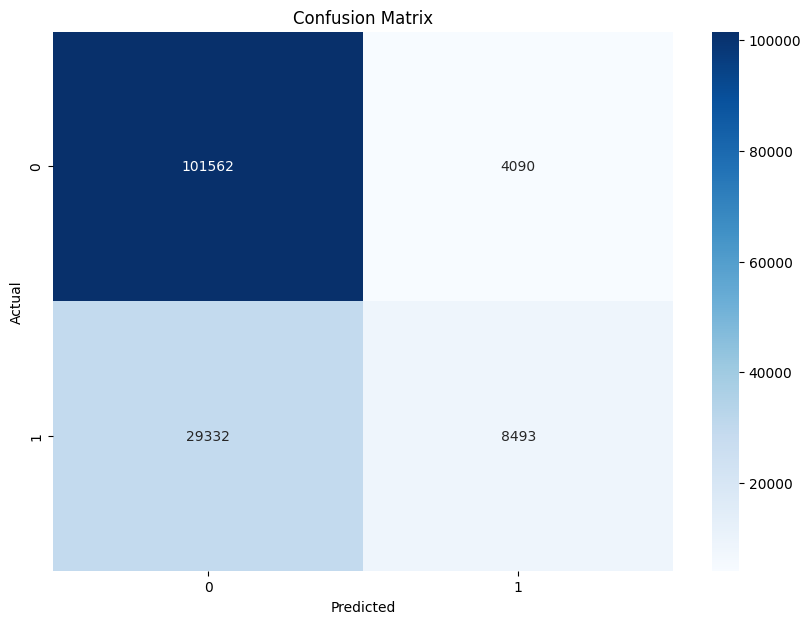

F1 Score: 0.7211618984493368
AUC: 0.7380747204361129


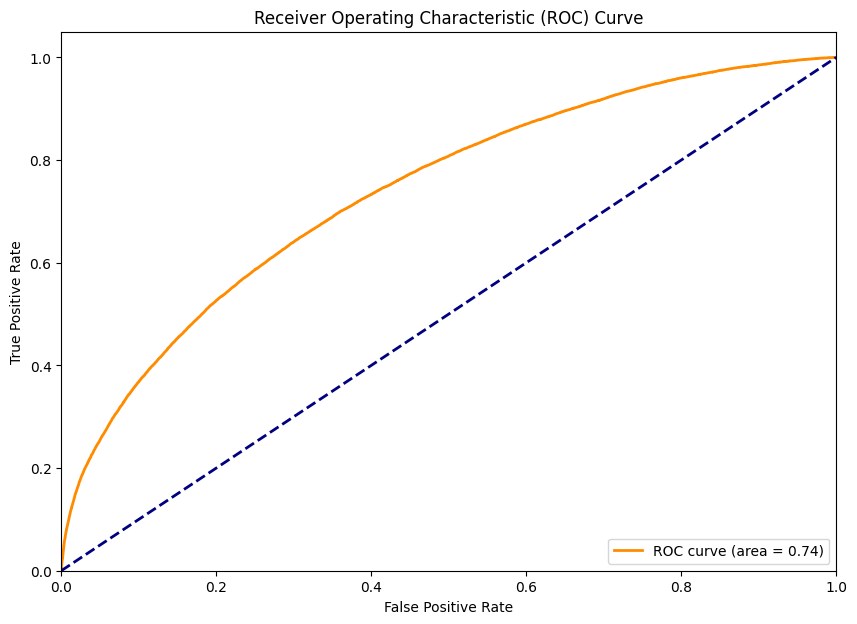

In [ ]:
#TF-IDF as the Feature Extraction Technique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, f1_score
import xgboost as xgb

# Split the data into features and target variable
X = df['cleaned_review']
y = df['is_spoiler']

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    tree_method='hist',  # Optimized for CPU
    objective='binary:logistic'
)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model on the entire training set
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for ROC Curve

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


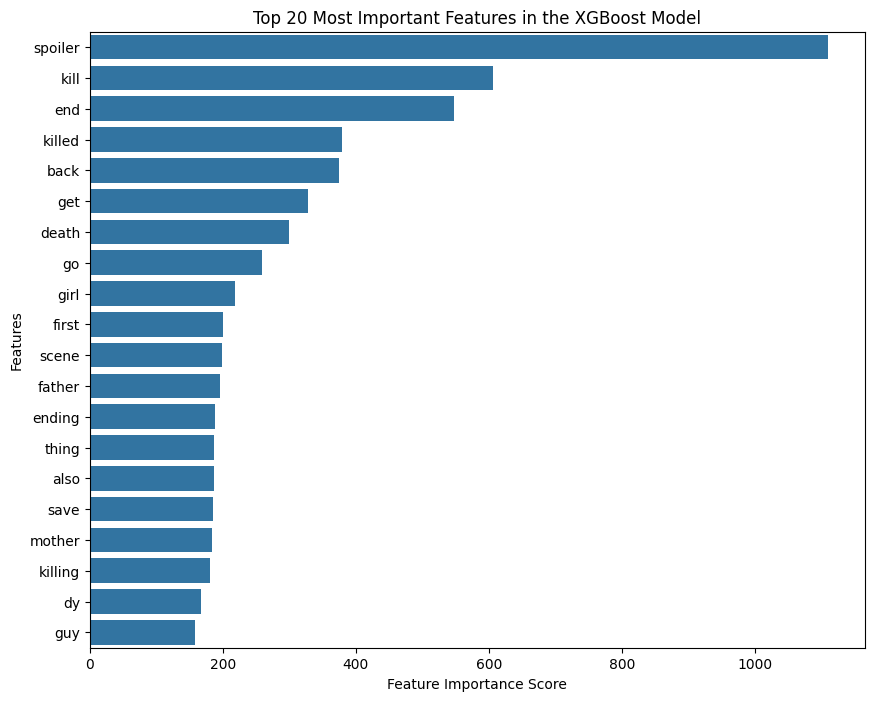

In [ ]:
# Feature importance based on gain
feature_importances = model.get_booster().get_score(importance_type='gain')

# Map feature indices to names
feature_names = vectorizer.get_feature_names_out()
mapped_feature_importances = {feature_names[int(k[1:])]: v for k, v in feature_importances.items()}

# Sort features according to importance
sorted_features = sorted(mapped_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Top 20 features
top_features = sorted_features[:20]
feature_names, scores = zip(*top_features)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=list(scores), y=list(feature_names))
plt.title('Top 20 Most Important Features in the XGBoost Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

Cross-validation scores: [0.76876612 0.76864995 0.76667519 0.76863834 0.76819423]
Mean cross-validation score: 0.7681847645243749
Test Accuracy: 0.7667779504728981
Test Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.96      0.86    105652
        True       0.67      0.23      0.34     37825

    accuracy                           0.77    143477
   macro avg       0.72      0.59      0.60    143477
weighted avg       0.75      0.77      0.72    143477



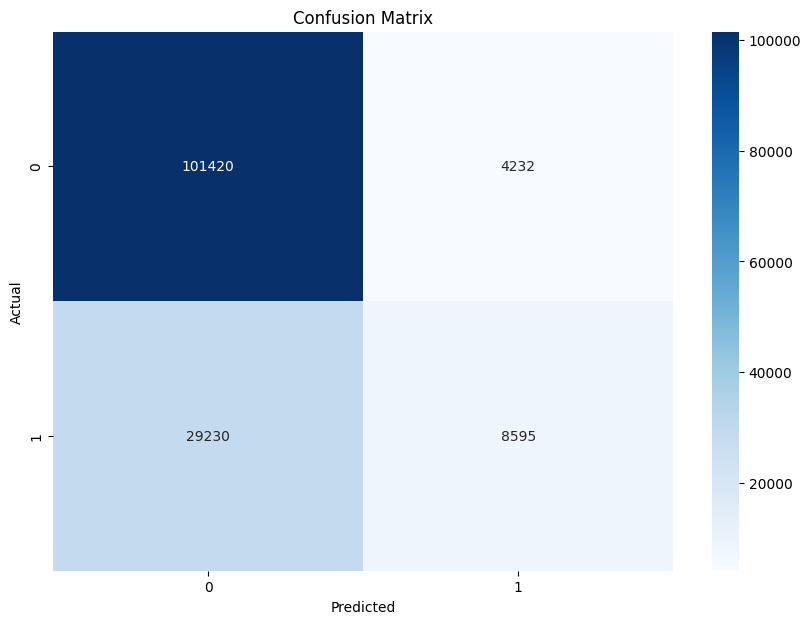

F1 Score: 0.7215636481808252
AUC: 0.7369830929806366


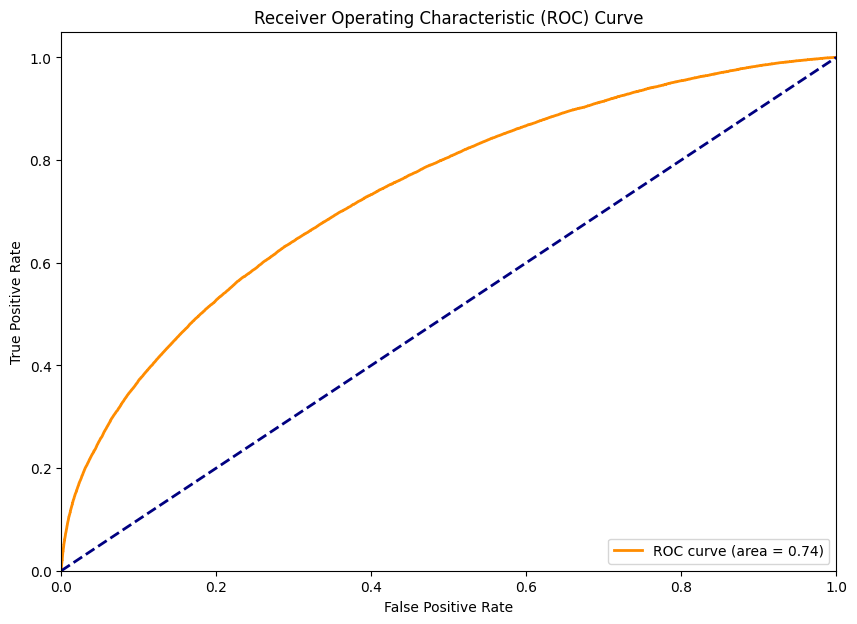

In [ ]:
#Bag of Words as the Feature Extraction Technique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, f1_score
import xgboost as xgb

# Split the data into features and target variable
X = df['cleaned_review']
y = df['is_spoiler']

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Count Vectorizer
vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    tree_method='hist',  # Optimized for CPU
    objective='binary:logistic'
)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_bow, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model on the entire training set
model.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_bow)
y_prob = model.predict_proba(X_test_bow)[:, 1]  # Probabilities for ROC Curve

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


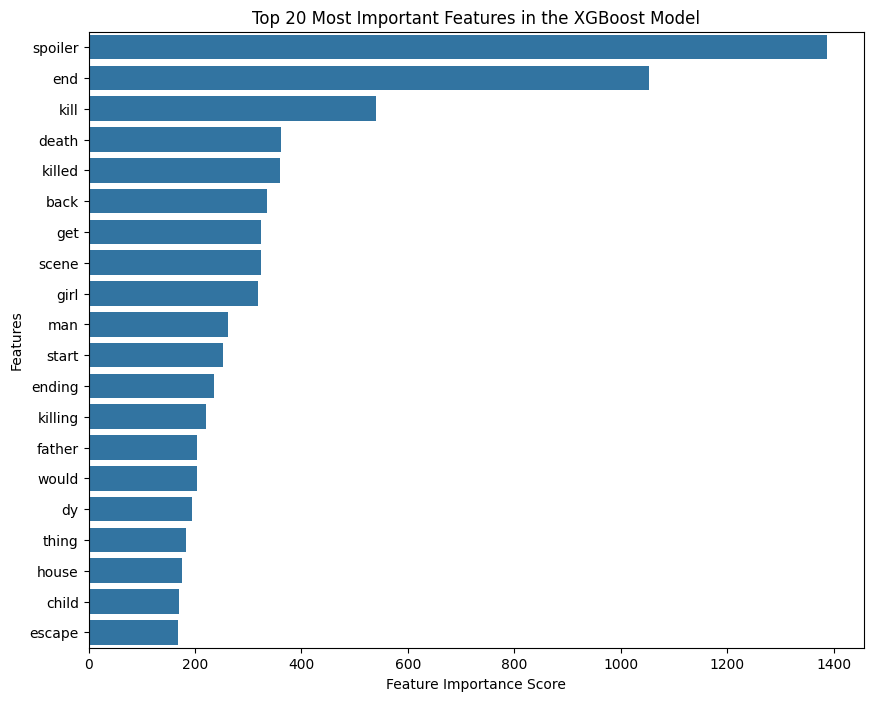

In [ ]:
# Feature importance based on gain
feature_importances = model.get_booster().get_score(importance_type='gain')

# Map feature indices to names
feature_names = vectorizer.get_feature_names_out()
mapped_feature_importances = {feature_names[int(k[1:])]: v for k, v in feature_importances.items()}

# Sort features according to importance
sorted_features = sorted(mapped_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Top 20 features
top_features = sorted_features[:20]
feature_names, scores = zip(*top_features)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=list(scores), y=list(feature_names))
plt.title('Top 20 Most Important Features in the XGBoost Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

# **Model Evaluation**

In [ ]:
#Accuracy Scores for Models using TF-IDF
acc_log_reg_tfidf = 0.774
acc_nb_tfidf = 0.746
acc_xgb_tfidf = 0.767
#Accuracy Scores for Models using BOW
acc_log_reg_bow = 0.77
acc_nb_bow = 0.728
acc_xgb_bow = 0.767
#F1 Scores for Models using TF-IDF
f1_log_reg_tfidf = 0.744
f1_nb_tfidf = 0.656
f1_xgb_tfidf = 0.721
#F1 Scores for Models using BOW
f1_log_reg_bow = 0.738
f1_nb_bow = 0.73
f1_xgb_bow = 0.721
#AUC Scores for Models using TF-IDF
auc_log_reg_tfidf = 0.76
auc_nb_tfidf = 0.72
auc_xgb_tfidf = 0.738
#AUC Scores for Models using BOW
auc_log_reg_bow = 0.745
auc_nb_bow = 0.699
auc_xgb_bow = 0.734

models = ['Logistic Regression', 'Naive Bayes', 'XGBoost']
accuracies_tfidf = [acc_log_reg_tfidf, acc_nb_tfidf, acc_xgb_tfidf]
accuracies_bow = [acc_log_reg_bow, acc_nb_bow, acc_xgb_bow]
f1_scores_tfidf = [f1_log_reg_tfidf, f1_nb_tfidf, f1_xgb_tfidf]
f1_scores_bow = [f1_log_reg_bow, f1_nb_bow, f1_xgb_bow]
auc_scores_tfidf = [auc_log_reg_tfidf, auc_nb_tfidf, auc_xgb_tfidf]
auc_scores_bow = [auc_log_reg_bow, auc_nb_bow, auc_xgb_bow]


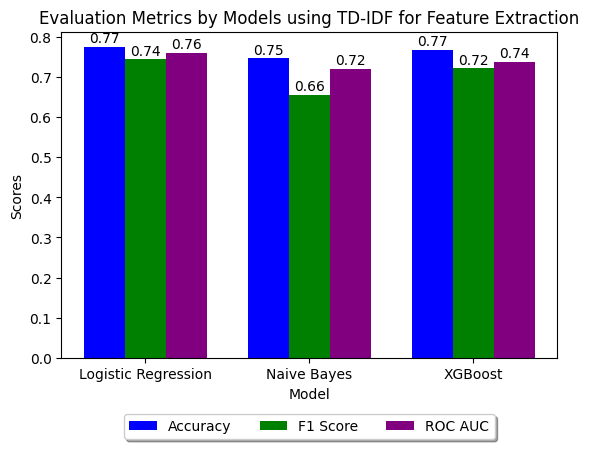

In [ ]:
# Number of groups
n_groups = len(models)

# Create bar width and positions
bar_width = 0.25
index = np.arange(n_groups)

# Creating the plot
fig, ax = plt.subplots()
bar1 = ax.bar(index, accuracies_tfidf, bar_width, label='Accuracy', color='b')
bar2 = ax.bar(index + bar_width, f1_scores_tfidf, bar_width, label='F1 Score', color='g')
bar3 = ax.bar(index + 2 * bar_width, auc_scores_tfidf, bar_width, label='ROC AUC', color='purple')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Models using tf-idf for Feature Extraction')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)

# Adding data labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Move the legend to the bottom
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)

# Adjust layout to make room for the legend
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()

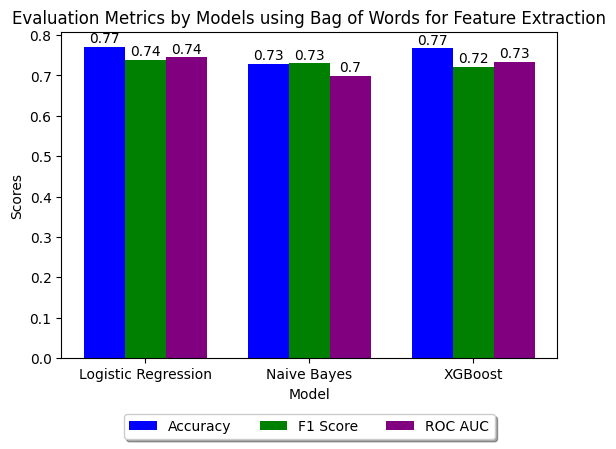

In [ ]:
# Number of groups
n_groups = len(models)

# Create bar width and positions
bar_width = 0.25
index = np.arange(n_groups)

# Creating the plot
fig, ax = plt.subplots()
bar1 = ax.bar(index, accuracies_bow, bar_width, label='Accuracy', color='b')
bar2 = ax.bar(index + bar_width, f1_scores_bow, bar_width, label='F1 Score', color='g')
bar3 = ax.bar(index + 2 * bar_width, auc_scores_bow, bar_width, label='ROC AUC', color='purple')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Models using Bag of Words for Feature Extraction')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)

# Adding data labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Move the legend to the bottom
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)

# Adjust layout to make room for the legend
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()